In [44]:
#if you already have the packages, Please ignore this block of code.
using Pkg
Pkg.add("StatsPlots")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("ScikitLearn")
Pkg.add("NaiveBayes")
Pkg.add("Random")

   Updating registry at `C:\Users\Rachel\.julia\registries\General`
  Resolving package versions...
  Installed TableOperations ─ v1.0.0
  Installed Widgets ───────── v0.6.2
  Installed StatsPlots ────── v0.14.20
  Installed Observables ───── v0.3.3
  Installed DataValues ────── v0.4.13
Updating `C:\Users\Rachel\.julia\environments\v1.5\Project.toml`
  [f3b207a7] + StatsPlots v0.14.20
Updating `C:\Users\Rachel\.julia\environments\v1.5\Manifest.toml`
  [e7dc6d0d] + DataValues v0.4.13
  [510215fc] + Observables v0.3.3
  [f3b207a7] + StatsPlots v0.14.20
  [ab02a1b2] + TableOperations v1.0.0
  [cc8bc4a8] + Widgets v0.6.2


In [45]:
using DataFrames, CSV, ScikitLearn, NaiveBayes, Random, StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


In [2]:
@sk_import feature_extraction.text:CountVectorizer
@sk_import naive_bayes: GaussianNB
@sk_import model_selection: train_test_split
@sk_import metrics: accuracy_score

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore C:\Users\Rachel\.julia\packages\ScikitLearn\NJwUf\src\Skcore.jl:179


PyObject <function accuracy_score at 0x000000005BDAAB80>

# Preprocessing

Loading Files into DataFrame

In [12]:
df = DataFrame(CSV.File("training.1600000.processed.noemoticon.csv", header = ["score", "id", "date", "query", "user", "text"]))

,score,id,date,query,user,text
,Int64,Int64,String,String,String,String
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
5,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
6,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
7,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
8,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
9,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it


Convert DF into array. Shuffle to increase randomness.
To change the number of datas, change ``[1:15000]``

In [17]:
data = convert(Array, df[shuffle(1:nrow(df))[1:15000], :])
text = data[:,6]

15000-element Array{Any,1}:
 "twitando no facebook "
 "just saw the movie orochi, v interesting. read it's based on a manga. now i need the manga &amp; the movie theme song. "
 "What if I just clocked out, drove home, and went to bed? How much trouble could I REALLY be in for doing that? Mnn.. not trying. "
 "@6is7 frick i work the next two weekends coz my boss hates me "
 "@sammieepaige morning! where do you live again? "
 "@Alex2525 still hoping to get Santigold tickets... apparently they are sold out everywhere.  Brooklyn we go hard?"
 "Ali and Leia should come over "
 "@SamMarinucci I saw the trailer for My Sister's Keeper at 17 again!!! It looks really good but I'm not really a fan of the cast "
 "@markhoppus havent seen it yet    is it good?"
 "Masterchef! Damn that looks TASTEYYYYYYYYYYYYYY, although duck  quack."
 "Will miss bia once she leaves "
 "Counting down the days... On Friday we're leaving for NYC! "
 "@ZooeyDe : It's very nice to be able following you on Twitter "
 ⋮
 

Using regex to process each tweet 

In [18]:
for i in 1:length(text)
    text[i] = filter(isascii, text[i]) #remove any non-UTF-8
    text[i] = replace(text[i], r"((www\.[^\n]+)|(https?:[^\s]+))" => "")   #remove websites
    text[i] = replace(text[i], r"(^|[^@\w])@(\w{1,15})\b" => "") #remove at_users
    text[i] = replace(text[i], r"[^A-Za-z ]" => "")    #remove any non-word, non-space character
    text[i] = replace(text[i], r"[\s\t\n]+" => " ")        #remove any tab and line character
    text[i] = replace(text[i], r"(^[\s]+|[\s]+$)" => "")   #remove any leading or tailing white space
    text[i] = lowercase(text[i])   # to lower case
end

# Regular Naive Bayesian Classifier using ScikitLearn GaussianNB

In [19]:
one = CountVectorizer()
x = one.fit_transform(text)

x_train, x_test, y_train, y_test = train_test_split(x.toarray(), data[:,1], test_size = 0.2)

nb = GaussianNB()
fit!(nb,x_train,y_train)

PyObject GaussianNB()

In [16]:
pred10k = ScikitLearn.predict(nb, x_test)
accu10k = accuracy_score(pred10k, y_test)

0.5675

accu10k = 0.5675

In [20]:
pred15k = ScikitLearn.predict(nb, x_test)
accu15k = accuracy_score(pred15k, y_test)

0.5623333333333334

accu15k = 0.5623333333333334

In [33]:
pred20k = ScikitLearn.predict(nb, x_test)
accu20k = accuracy_score(pred20k, y_test)

0.54975

accu20k = 0.54975

In [47]:
pred30k = ScikitLearn.predict(nb, x_test)
accu30k = accuracy_score(pred30k, y_test)

0.5396666666666666

accu30k = 0.5396666666666666

# Enhanced Naive Bayesian Classifier using Laplace Smoothing

In [177]:
sentences, test_sentences, sentiments,test_sentiments = train_test_split(text, data[:,1], test_size=0.2)

4-element Array{Array{T,1} where T,1}:
 ["yes although my ankle is the killer i have a bad ligament", "woot my parkway drive ticket arrived", "hanging out with my smallest dude missing the bigger one i think tj should be famous he has a huge personality and dimples", "maryam has bronchitis", "i love shopping new dress sweater and shoes", "felipe massaferrari so unlucky in spain gp goodbye ferrari theres no hope in this year", "in tha house sore from working outkinda missin special k thinks hes upset me", "enjoying dayton and really wishing that i didnt have to keep studying", "excited to have family in town and go with them to the pool today", "oh amp december was there too what a sweet babygirl"  …  "i have no clothes", "well surprised is what i was going for the pinky purple bottle is coconut milk and tiare flower foamburst shower gel", "delivery date was meant to be today but apparently it hasnt even arrived at the dealership yet", "with a president named barack what difference does

Inserting each unique words as key to the Dictionary with value represents count of positive and negative sentiments

In [178]:
validate_sentiment = test_sentiments
train_sentiment = sentiments
validate_sentence = test_sentences
train_sentence = sentences
dict_words = Dict()
pos_cnt = 0
total_pos = 0
total_neg = 0
for x in 1 : length(train_sentence)
    if train_sentiment[x] == 4
      pos_cnt+=1
    end
end
for i in 1 : length(train_sentence)
    words = split(train_sentence[i], " ")  #list of tokenized words
    stemmed_words = words
    unique_words = unique(stemmed_words) 
    #So that a sentence contain only 1 unique word. (this is useful if a sentence contains more than 1 occurence of a word)
    for j in unique_words
        if !haskey(dict_words, j)
            dict_words[j] = [1,1]   # make a list of 2 elements using Laplace Smoothing. 
            total_pos+=1  # total_pos is the count of all word's positive sentiments that belong to the dictionary 
            total_neg+=1
        end
        if train_sentiment[i] == 4
            dict_words[j][1]+=1 
            total_pos+=1   
        elseif train_sentiment[i] == 0
            dict_words[j][2]+=1
            total_neg+=1
        end
    # this is a dictionary of lists , in which 1st element of list represents count of positive sentiments
    # (sentences)that word belongs to and the 2nd element is the count of negative sentiments(sentences) that word belong to.
    end
end

VALIDATING DATA==============================================================================

In [179]:
pred_sentiments = []
for i in 1:length(validate_sentence)
    words = split(validate_sentence[i], " ")  #list of tokenized words
    stemmed_words = words
    unique_words = unique(stemmed_words) 
    
    pos_prob = pos_cnt/length(train_sentiment)  #class probability(prior)
    neg_prob = 1-pos_prob
    for j in unique_words
        if !haskey(dict_words, j)    #if word not existed in the training set, apply Laplace Smoothing
            pos_prob*=(1/total_pos) 
            neg_prob*=(1/total_neg)
        else  
            pos_prob*=((dict_words[j][1])/total_pos) 
            neg_prob*=((dict_words[j][2])/total_neg)
        end
    end
    if pos_prob>=neg_prob
        push!(pred_sentiments, 4)
    else
        push!(pred_sentiments, 0)
    end
end

Evaluation==========================================================================================


In [180]:
tp=0 #true positive
tn=0 #true negative
fp=0 #false positive
fn=0 #false negative
for x in 1:length(pred_sentiments)
    if pred_sentiments[x] == validate_sentiment[x] == 4
      tp+=1
    end
    if pred_sentiments[x] == validate_sentiment[x] == 0
      tn+=1
    end
    if (pred_sentiments[x] == 4) && (validate_sentiment[x] == 0)
      fp+=1
    end
    if (pred_sentiments[x] == 0) && (validate_sentiment[x] == 4)
      fn+=1
    end
end

test_accuracy = (tp+tn)/(tp+tn+fp+fn)

0.782659375

In [56]:
enhanced_accu10k = test_accuracy

0.74

In [63]:
enhanced_accu15k = test_accuracy

0.746

In [84]:
enhanced_accu20k = test_accuracy

0.755

In [116]:
enhanced_accu30k = test_accuracy

0.7586666666666667

In [160]:
enhanced_accu100k = test_accuracy

0.76275

In [167]:
enhanced_accu500k = test_accuracy

0.77964

In [174]:
enhanced_accu1m = test_accuracy

0.781395

In [181]:
enhanced_accu1_6m = test_accuracy

0.782659375

enhanced_accu10k = 0.74

enhanced_accu15k = 0.746

enhanced_accu20k = 0.755

enhanced_accu30k = 0.7586666666666667

enhanced_accu100k = 0.76275

enhanced_accu500k = 0.77964

enhanced_accu1m = 0.781395

enhanced_accu1_6m = 0.782659375

# Report

Due to machine restriction, I can only perform regular Naive Bayesian Classifier with data size up to ``30k``. Therefore, I will compare the regular and enhanced model with data size of ``10k, 15k, 20k and 30k`` 

I will analysis the enhanced Naive Bayesian Classifier seperately with larger datas. 

## Comparsion Between Two NBCs

In [30]:
regular_accu10k = 0.5675
regular_accu15k = 0.5623333333333334
regular_accu20k = 0.54975
regular_accu30k = 0.5396666666666666

0.5396666666666666

In [23]:
enhanced_accu10k = 0.74
enhanced_accu15k = 0.746
enhanced_accu20k = 0.755
enhanced_accu30k = 0.7586666666666667

0.7586666666666667

In [61]:
y1 = [regular_accu10k,regular_accu15k,regular_accu20k,regular_accu30k]
y2 = [enhanced_accu10k,enhanced_accu15k,enhanced_accu20k,enhanced_accu30k]
x = ["10k", "15k", "20k", "30k"]
y = hcat(y1, y2);

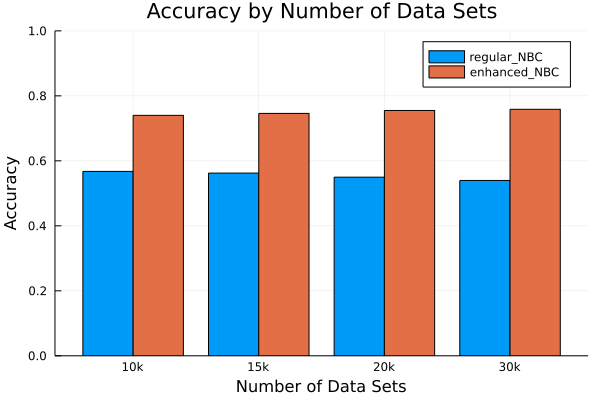

In [82]:
groupedbar(y, bar_position = :dodge, xticks=(1:4, x), labels = ["regular_NBC" "enhanced_NBC"],
            xlabel = "Number of Data Sets", ylabel = "Accuracy",
            title = "Accuracy by Number of Data Sets", ylims = (0,1))

From the number of data sets from 10k to 30k, the regular NBC scores lower accuracy at around 55%. There is little to no improvement for the regular NBC accuracy as the number of dataset gets larger. I believe this is becaused regular NBC calculated the probability based on the frequency of the words. So if a word does not exit in the training data, it will have a probabiliy of 0. As a result, the accuray of NBC decreases. 

However, for sentiment analysis, the presence or absence of a word is more important than its frequency. To solve this problem, the Laplace Smoothing technique is employed. In my solution, if I found a word not existing in the training dataset, I increase the numerator pf P(x|c) by the number of positive and negative words. This solution will consider if a word appears or not, which increases the accuracy of sentiment analysis to around 75% with 10k to 30k datasets. Moreover, the accuracy increases as the number of dataset increases. This proofs that Laplace Smoothing is a great technic for sentiment analysis.

## Analysis of Enhanced NBC on Larger Data Sets

In [84]:
enhanced_accu100k = 0.76275
enhanced_accu500k = 0.77964
enhanced_accu1000k = 0.781395
enhanced_accu1600k = 0.782659375
y3 = [enhanced_accu100k,enhanced_accu500k,enhanced_accu1000k,enhanced_accu1600k]
x2 = ["100k", "500k", "1000k", "1600k"]

4-element Array{String,1}:
 "100k"
 "500k"
 "1000k"
 "1600k"

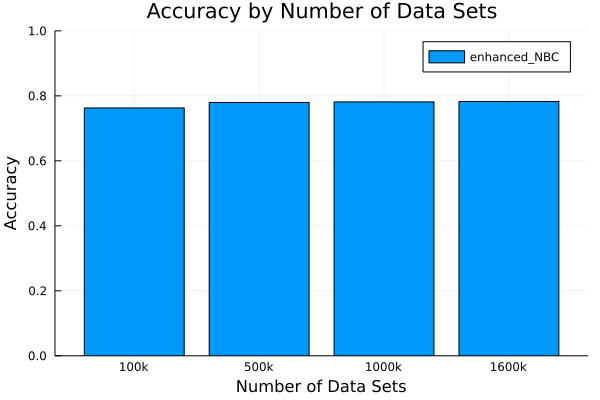

In [90]:
bar(y3, bar_position = :dodge, xticks=(1:4, x2), label = "enhanced_NBC",
            xlabel = "Number of Data Sets", ylabel = "Accuracy",
            title = "Accuracy by Number of Data Sets", ylims = (0,1))

For larger datasets from 100k to 1.6m, the accuracy of the Laplace Smoothing enhanced NBC increased from 76.27% to 78.26%. The accuracy is very consistent and it will keep on increasing if the number of dataset increases. As a result, I believe the Laplace Smoothing is a great technic for sentiment analysis.

## Reference

Y. G. Jung, K. T. Kim, B. Lee and H. Y. Youn, "Enhanced Naive Bayes Classifier for real-time sentiment analysis with SparkR," 2016 International Conference on Information and Communication Technology Convergence (ICTC), 2016, pp. 141-146, doi: 10.1109/ICTC.2016.7763455. https://ieeexplore.ieee.org/abstract/document/7763455

https://github.com/dfdx/NaiveBayes.jl

https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece#:~:text=Laplace%20smoothing%20is%20a%20smoothing%20technique%20that%20helps%20tackle%20the,the%20positive%20and%20negative%20reviews.

https://github.com/vedant781999/Sentiment-Analysis

https://github.com/scikit-learn/scikit-learn
